<a href="https://colab.research.google.com/github/T3LNET/OCR/blob/main/Tesseract_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
pip install pytesseract

In [6]:
import pytesseract
from pytesseract import Output
from PIL import Image
import requests
import io
import cv2

In [ ]:
img_address= ""
request = requests.get(img_address)
if request.status_code == 200:
    try:
        image=Image.open(io.BytesIO(request.content))
        results = pytesseract.image_to_data(image,output_type=Output.DICT)
        for i in range(0, len(results["text"])):
          x = results["left"][i]
          y = results["top"][i]

          w = results["width"][i]
          h = results["height"][i]

          text = results["text"][i]
          conf = int(results["conf"][i])

          if conf > 70:
              text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
              cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
              cv2.putText(image, text, (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)
    except Exception as e:
        print(f"Error: {str(e)}")
else:
    print('Failed to download the image from the URL.')

In [28]:
filename = 'Numerology-in-Farsi.png'
image = cv2.imread(filename)

In [17]:
results = pytesseract.image_to_data(image,output_type=Output.DICT)

In [18]:
for i in range(0, len(results["text"])):
  x = results["left"][i]
  y = results["top"][i]

  w = results["width"][i]
  h = results["height"][i]

  text = results["text"][i]
  conf = int(results["conf"][i])

  if conf > 70:
      text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      cv2.putText(image, text, (x, y - 10),
cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

In [13]:
cv2.imshow(image)

DisabledFunctionError: ignored

In [19]:
from google.colab.patches import cv2_imshow

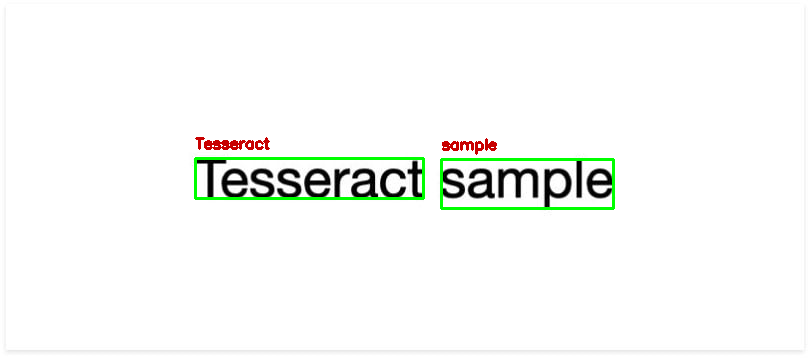

In [20]:
cv2_imshow(image)

In [35]:
# os.environ['TESSDATA_PREFIX'] = tessdata_path
text = pytesseract.image_to_string(image,lang="osd")
print(f"extracted image: ",text)

extracted image:  غاللعارقا رد نهقدرىر سم سرلعا ىلشانا
سزقا زد 酬تودمد దిدسا ئيللاقو

لعاتأور

تووء مة



/bin/bash: line 1: command not found
